In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Задание 4.1
Изменить размер изображения.

Original Dimensions :  (1564, 1564, 3)
Resized Dimensions:  (782, 782, 3)


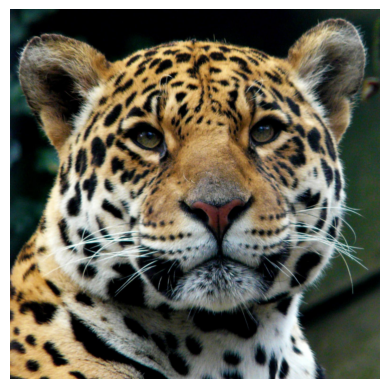

In [21]:
img = cv2.imread('images/jaguar.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('Original Dimensions : ',img.shape)

scale_percent = 50
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(
    img, 
    dim, 
    interpolation=cv2.INTER_AREA
)
print('Resized Dimensions: ', resized.shape)
plt.imshow(resized)
plt.axis('off')
plt.show()

Изменить размеры можно так же и в ручную:

Original Dimensions :  (1564, 1564, 3)
Resized Dimensions :  (710, 710, 3)


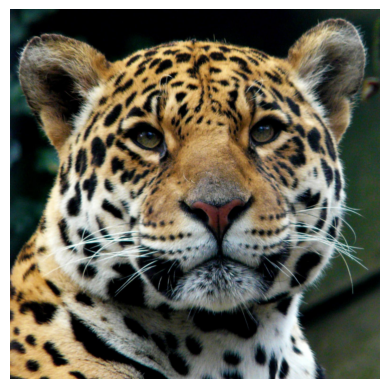

In [22]:
print('Original Dimensions : ',img.shape)
width = 710
height = 710
dim1 = (width, height)
resized1 = cv2.resize(
    img, 
    dim1, 
    interpolation=cv2.INTER_AREA
)
print('Resized Dimensions : ', resized1.shape)
plt.imshow(resized)
plt.axis('off')
plt.show()

Размер изображения можно так же изменить задав коэффициент масштабирования:

Original Dimensions :  (1564, 1564, 3)
Resized Dimensions :  (3128, 3128, 3)


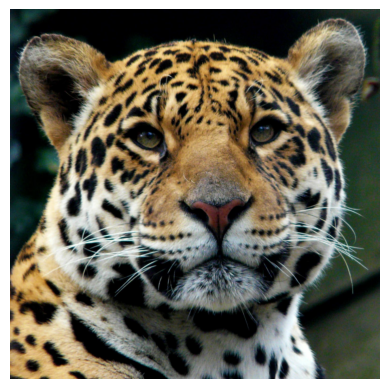

In [23]:
print('Original Dimensions : ',img.shape)
res = cv2.resize(
    img,None,
    fx=2, 
    fy=2, 
    interpolation=cv2.INTER_CUBIC
)
print('Resized Dimensions : ', res.shape)
plt.imshow(res)
plt.axis('off')
plt.show()

# Задание 4.2
Определить размер изображения и сдвинуть изображение на 100 столбцов и 50 строк.

С помощью функции cv.warpAffine () изображение сдвигается в направлении (tx, ty).

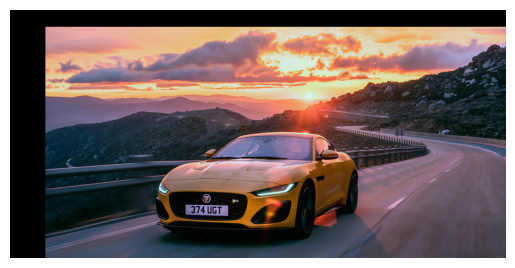

In [4]:
img = cv2.imread('images/jaguar_car.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows, cols, something = img.shape
M = np.float32([[1,0,100], [0,1,50]])
dst = cv2.warpAffine(img, M, (cols,rows))

plt.imshow(dst)
plt.axis('off')
plt.show()

# Задание 4.3
Определить размер изображения, его центр и повернуть его на 90 градусов.

У функции вращения cv.getRotationMatrix2D(,) первые два аргумента – координаты центра, третий аргумент – угол поворота.

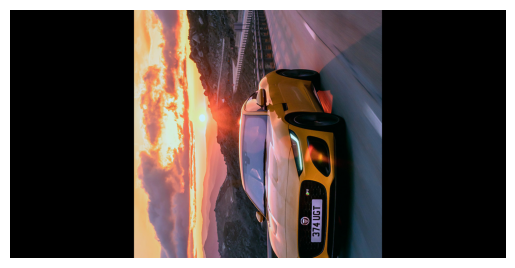

In [39]:
rows, cols, something = img.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))

plt.imshow(dst)
plt.axis('off')
plt.show()

# Задание 4.4
Определить размер изображения, задать 3 точки, изменить их координаты и провести аффинное преобразование всего изображения по этим точкам.

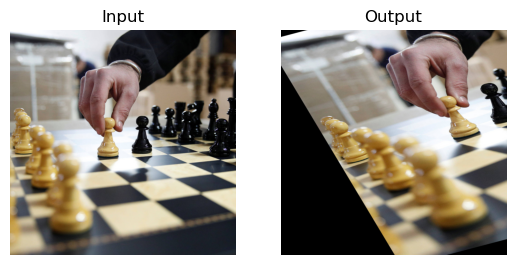

In [5]:
img = cv2.imread('images/chess.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows, cols, ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(121), plt.imshow(img), plt.title('Input')
plt.axis("off")
plt.subplot(122), plt.imshow(dst), plt.title('Output')
plt.axis("off")
plt.show()

# Задание 4.5
Провести охват изображения в прямоугольник, повернутый так, чтобы площадь этого прямоугольника была минимальной.

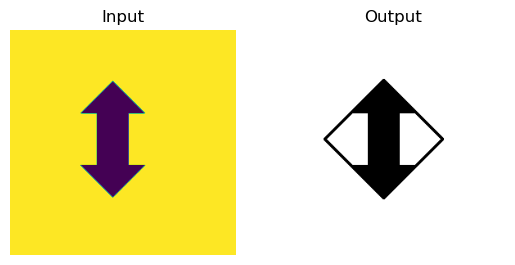

In [28]:
img = cv2.imread('images/strelka.png', 0)

plt.subplot(121),plt.imshow(img), plt.title('Input')
plt.axis("off")

ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, 1, 1)
cnt = contours[0]
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.intp(box)
imp = cv2.drawContours(img, [box], 0, (0, 0, 255), 2)
imp = cv2.cvtColor(imp, cv2.COLOR_BGR2RGB)

plt.subplot(122),plt.imshow(imp), plt.title('Output')
plt.axis("off")
plt.show()

# Задание 4.6 
Провести охват изображения в круг.


Окружность с минимальной площадью, охватывающей объект,
можно нарисовать с помощью функции cv2.minEnclosingCircle ().

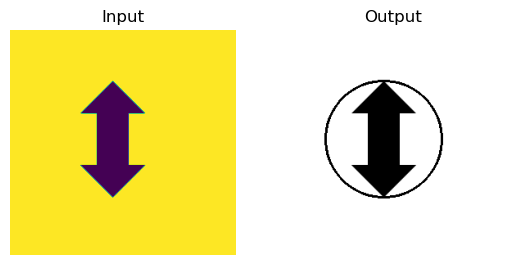

In [33]:
img = cv2.imread('images/strelka.png', 0)

plt.subplot(121),plt.imshow(img), plt.title('Input')
plt.axis("off")

(x, y), radius = cv2.minEnclosingCircle(cnt)
center = (int(x), int(y))
radius = int(radius)
img = cv2.circle(img, center, radius,(0, 255, 0), 2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(122),plt.imshow(img), plt.title('Output')
plt.axis("off")
plt.show()

# Задание 4.7

Провести охват изображения в эллипс, повернутый
так, чтобы площадь этого эллипса была минимальной.

Используя функцию cv2.ellipse(), можно вписать изображение в эллипс с минимальной площадью.

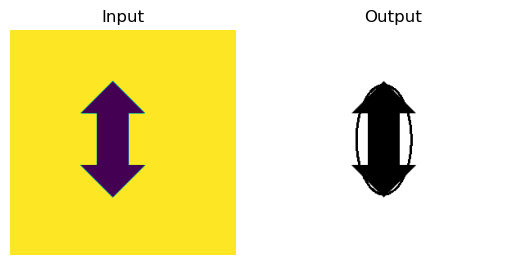

In [17]:
img = cv2.imread('images/strelka.png', 0)

plt.subplot(121),plt.imshow(img), plt.title('Input')
plt.axis("off")

ellipse = cv2.fitEllipse(cnt)
imag = cv2.ellipse(img,ellipse,(0,255,0),2)
imag = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                   
plt.subplot(122),plt.imshow(imag), plt.title('Output')
plt.axis("off")
plt.show()

# Задание 4.8
Провести прямую линию вдоль оси симметрии
изображения.

(-0.5, 275.5, 275.5, -0.5)

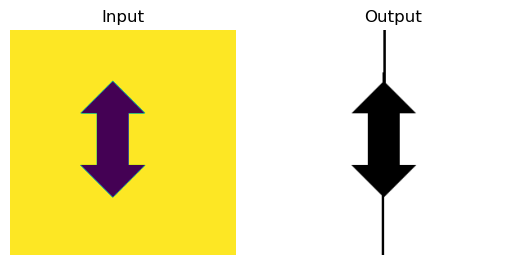

In [10]:
img = cv2.imread('images/strelka.png', 0)
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
inv = cv2.bitwise_not(thresh)

plt.subplot(121), plt.imshow(img), plt.title('Input')
plt.axis("off")

contours, hierarchy = cv2.findContours(inv, 1, 1)
cnt = contours[0]
rows, cols = inv.shape[:2]

[vx, vy, x, y] = cv2.fitLine(
    cnt,
    cv2.DIST_L2,
    0,
    0.01,
    0.01
)
lefty = int((-x * vy / vx) + y)
righty = int(((cols - x) * vy / vx) + y)

img = cv2.line(
    img,
    (cols-1,righty),
    (0,lefty),
    (0,255,0)
    ,2
)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(122),plt.imshow(img),plt.title('Output')
plt.axis("off")

# Задание 4.9
Нарисовать контур, охватывающий изображение, толщиной 2, вывести полученное изображение на экран.

In [14]:
image = cv2.imread('images/strelka.png', 0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Функция Canny выделяет контуры, а с помощью функции cv2.findContours() создаем иерархию контуров. Выделяем только внешние контуры изображения. Затем, используя цикл for, проходим по каждому из контуров изображения. С помощью переменной hull создаем выпуклую оболочку сначала для первого контура, затем для каждого другого контура. В результате получим контур, охватывающий изображение.

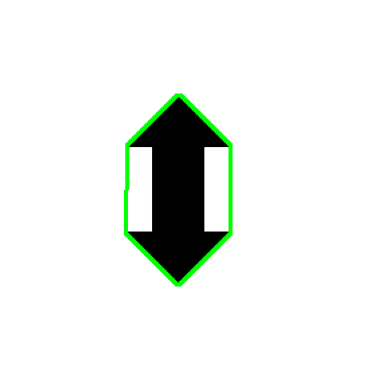

In [15]:
gray = cv2.cvtColor(image, 0)
edges = cv2.Canny(gray, 50, 200)

contours, hierarchy = cv2.findContours(
    edges.copy(),
    cv2.RETR_EXTERNAL, 
    cv2.CHAIN_APPROX_NONE
)

for cnt in contours:
    hull = cv2.convexHull(cnt)
    cv2.drawContours(image, [hull], 0, (0, 255, 0), 2)
    
plt.imshow(image)
plt.axis('off')
plt.show()

# Задание 4.10
Выполнить аппроксимацию контура, полагая epsilon =1%, epsilon=5% и epsilon=10%.

In [38]:
img = cv2.imread('images/strelka2.png', 0)
imag = cv2.imread('images/strelka2.png')

ret, thresh = cv2.threshold(img, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 2, 3)

Функция cv2.approxPolyDP(cnt,epsilon,True) позволяет аппроксимировать контур. Первый аргумент cnt = contours[i] – массив с координатами пикселей контура, аргумент epsilon задается в процентах, с уменьшением epsilon максимальное расстояние между ломаной прямой, аппроксимирующей контур, и самим контуром также уменьшается.

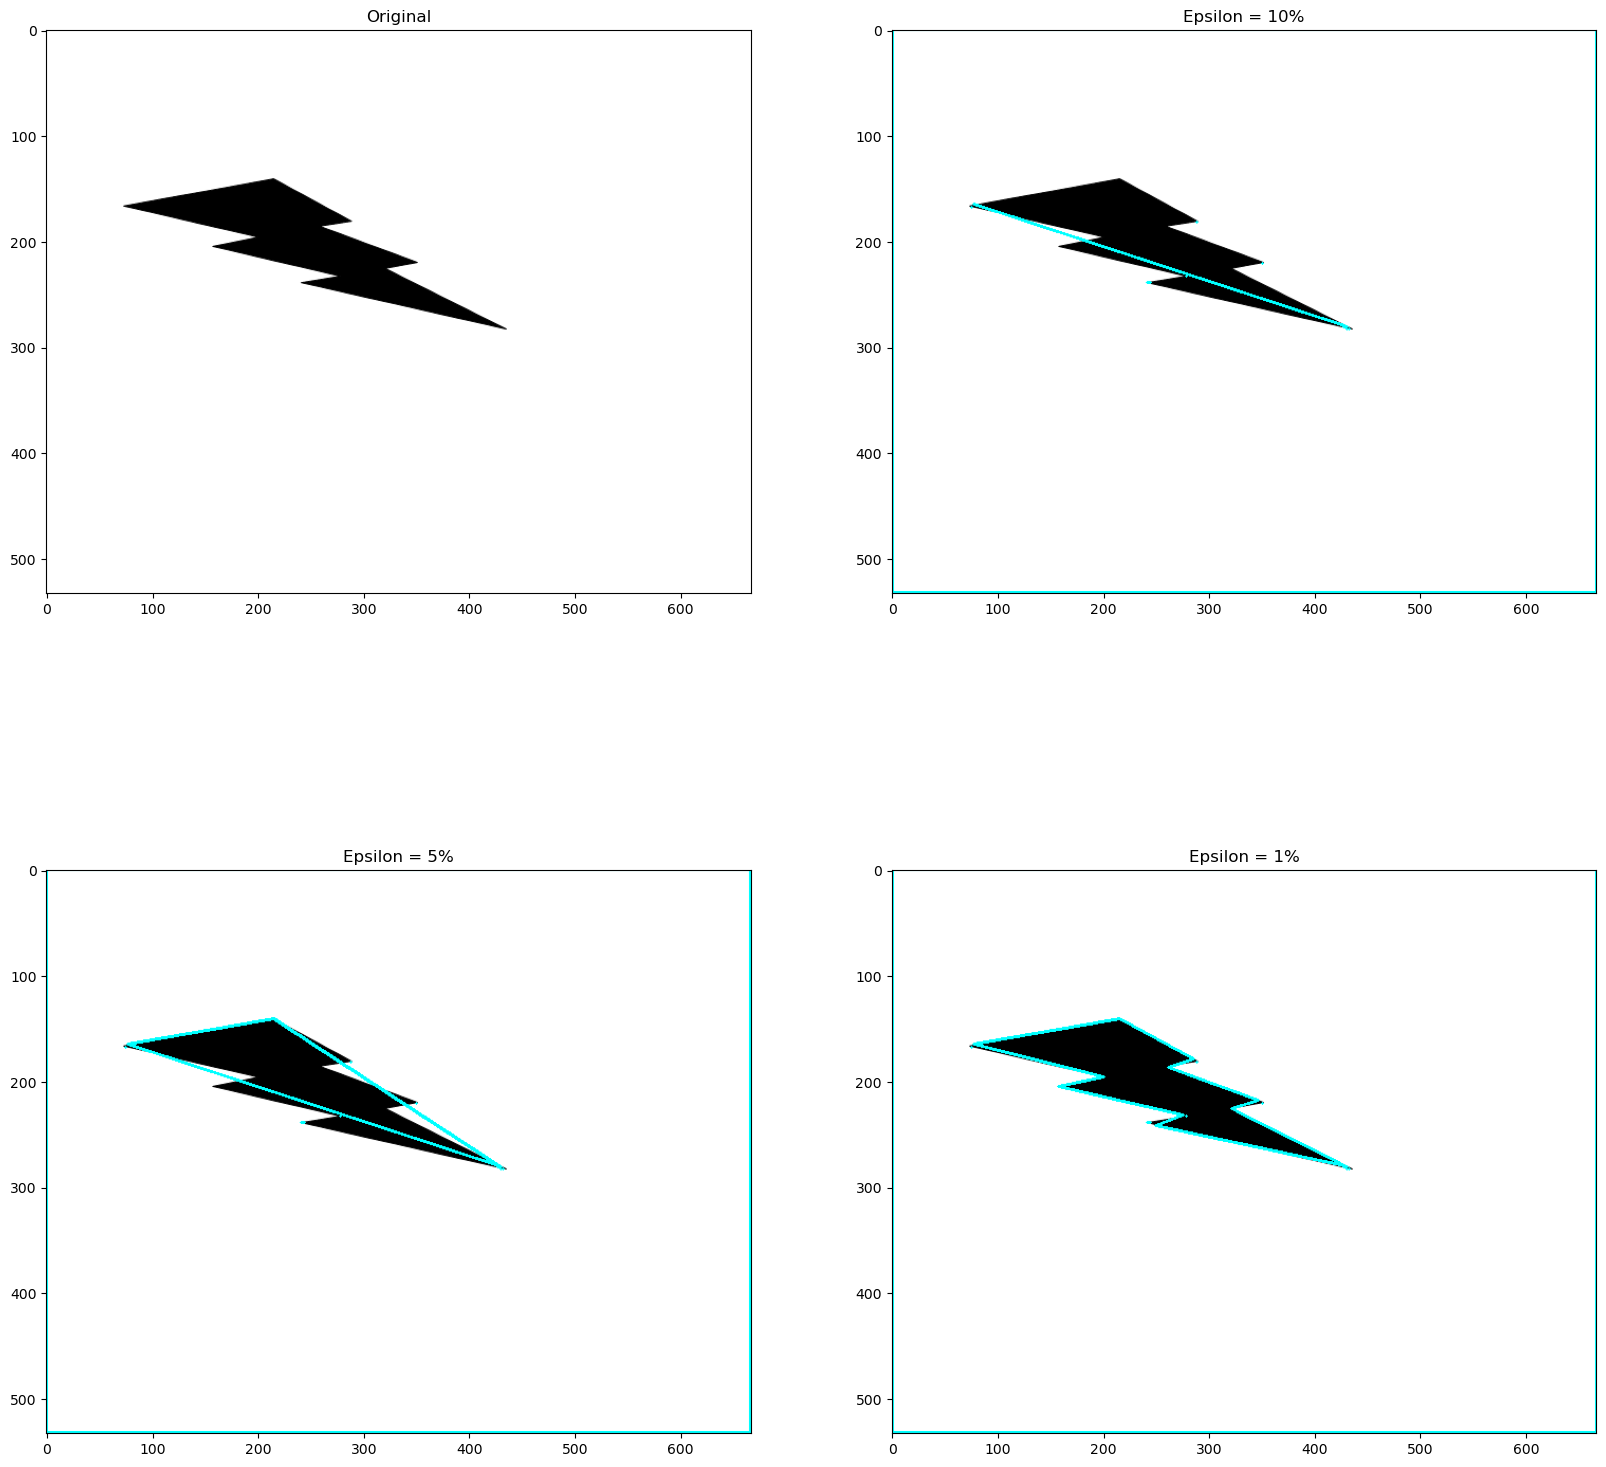

In [18]:
img = cv2.imread('images/strelka2.png', 0)

ret, thresh = cv2.threshold(img, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 2, 3)

img2 = cv2.imread('images/strelka2.png')

f = plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.title('Original')
plt.imshow(img,'gray')

plt.subplot(2,2,2)
plt.title('Epsilon = 10%')
for i, item in enumerate(contours):
    cnt = item
    epsilon = 0.1 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    cv2.drawContours(img2, [approx], -1, (0, 255, 255), 2)
plt.imshow(img2)

plt.subplot(2,2,3)
plt.title('Epsilon = 5%')
img3 = cv2.imread('images/strelka2.png')
for i, item in enumerate(contours):
    cnt = item
    epsilon = 0.05 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    cv2.drawContours(img3, [approx], -1, (0, 255, 255), 2)
plt.imshow(img3)

plt.subplot(2,2,4)
plt.title('Epsilon = 1%')
img4 = cv2.imread('images/strelka2.png')
for i, item in enumerate(contours):
    cnt = item
    epsilon = 0.01 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    cv2.drawContours(img4, [approx], -1, (0, 255, 255), 2)

plt.imshow(img4)
plt.show();

# Задание 4.11 
Нарисовать прямоугольник в месте, где нужно вырезать фрагмент (см. рис. 3), вывести на экран фрагмент, ограниченный прямоугольником, увеличив этот фрагмент. Определить размер изображения, его центр и повернуть его на 90 градусов.

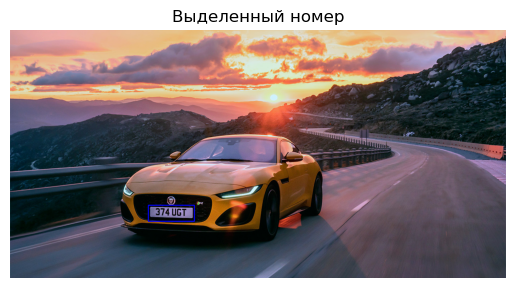

In [4]:
img = cv2.imread('images/jaguar_car.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

image = cv2.rectangle(
    img,
    (390, 495),
    (520, 540),
    (0, 0, 255),
    2
)

plt.axis('off')
plt.title('Выделенный номер')
plt.imshow(img);

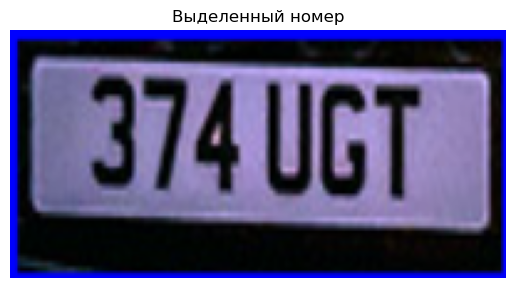

In [5]:
crop = img[495:540, 390:520]
piece = cv2.resize(
    crop, 
    (200, 100), 
    interpolation=cv2.INTER_LINEAR
)

plt.axis('off')
plt.title('Выделенный номер')
plt.imshow(piece);

200 100


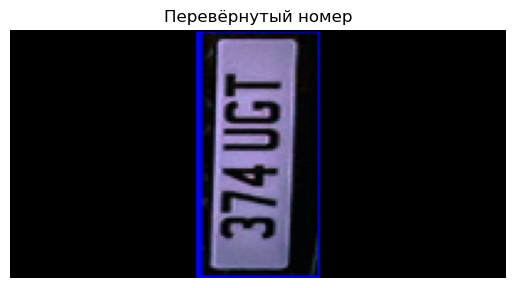

In [32]:
(h, w) = piece.shape[:2]
print(w,h)
center = (w / 2, h / 2)
M = cv2.getRotationMatrix2D(center, 90, 0.5)
rotated = cv2.warpAffine(piece, M, (200, 100))

plt.axis('off')
plt.title('Перевёрнутый номер')
plt.imshow(rotated);